# Thyroid Disease Classifier

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the Thyroid Disease dataset


In [ ]:
# Reading excel file using pandas

df = pd.read_excel("C:/Users/Rahul/Desktop/Stuff/thyroid-new.xls")
df.shape

(7200, 22)

In [ ]:
# Displaying the first 5 rows of the dataset

df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [ ]:
# Checking if there are any null values

df.isnull().any()

Age                          False
Sex                          False
On_thyroxine                 False
Query_on_thyroxine           False
On_antithyroid_medication    False
Sick                         False
Pregnant                     False
Thyroid_surgery              False
I131_treatment               False
Query_hypothyroid            False
Query_hyperthyroid           False
Lithium                      False
Goitre                       False
Tumor                        False
Hypopituitary                False
Psych                        False
TSH                          False
T3                           False
TT4                          False
T4U                          False
FTI                          False
Class                        False
dtype: bool

In [ ]:
df.describe(include="all")

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.520518,0.304306,0.130556,0.015417,0.012778,0.038333,0.010833,0.014028,0.016806,0.065556,...,0.008194,0.025556,0.000139,0.048889,0.004861,0.019977,0.109430,0.097838,0.113215,2.902778
std,0.189269,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.090158,0.157816,0.011785,0.215651,0.022979,0.007539,0.035969,0.019085,0.036098,0.365923
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000,1.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000,3.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000,3.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000,3.000000


In [ ]:
# Checking the types and no.of unique values in the table

temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['unique_count'] = df.nunique()
temp

,data_type,unique_count
Age,float64,98
Sex,int64,2
On_thyroxine,int64,2
Query_on_thyroxine,int64,2
On_antithyroid_medication,int64,2
Sick,int64,2
Pregnant,int64,2
Thyroid_surgery,int64,2
I131_treatment,int64,2
Query_hypothyroid,int64,2


In [ ]:
# Checking the count for labels

df['Class'].value_counts()

3    6666
2     368
1     166
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

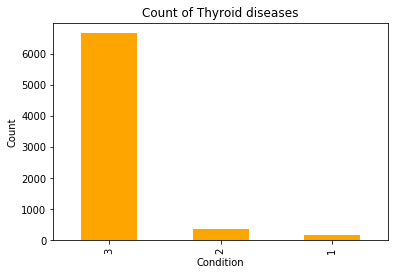

In [ ]:
# Visualizing the count for disease labels

df['Class'].value_counts().plot.bar(color = 'orange')
plt.title("Count of Thyroid diseases")
plt.xlabel("Condition")
plt.ylabel("Count")

In [ ]:
# Seperating independent and dependent variables

x = df.drop(['Class'], axis=1)
y = df['Class']
x.shape, y.shape

((7200, 21), (7200,))

In [ ]:
x.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [ ]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset into Training and Test sets

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver='lbfgs', multi_class='auto')
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using score method to get accuracy of model
score = logisticRegr.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  91.99074074074073


Text(0.5, 1, 'Accuracy Score: 0.9199074074074074')

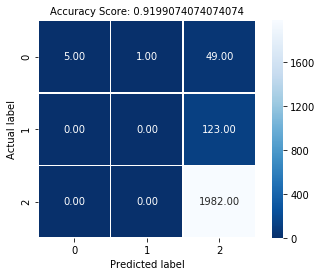

In [ ]:
# Plotting the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Using predicted y-label
pred_y = logisticRegr.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1, gamma='auto', random_state=10)
svm.fit(train_x, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Using score method to get accuracy of model
score = svm.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  92.12962962962963


Text(0.5, 1, 'Accuracy Score: 0.9212962962962963')

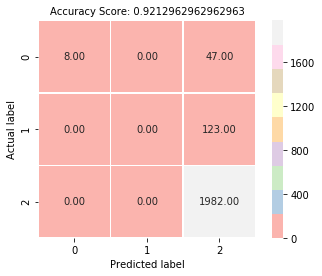

In [ ]:
# Plotting the confusion matrix

# Using predicted y-label
pred_y = svm.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Using score method to get accuracy of model
score = knn.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  92.96296296296296


Text(0.5, 1, 'Accuracy Score: 0.9296296296296296')

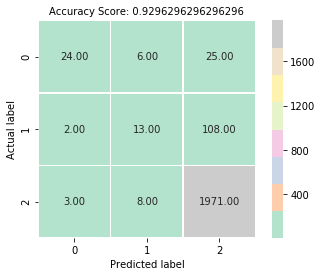

In [ ]:
# Plotting the confusion matrix

# Using predicted y-label
pred_y = knn.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Pastel2');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Using score method to get accuracy of model
score = mnb.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  91.75925925925927


Text(0.5, 1, 'Accuracy Score: 0.9175925925925926')

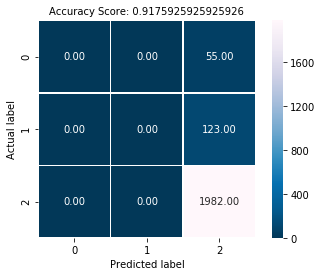

In [ ]:
# Plotting the confusion matrix

# Using predicted y-label
pred_y = mnb.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'PuBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Checking performance with default values

train_accuracy = []
test_accuracy = []

for depth in range(1,15):
    decTree = DecisionTreeClassifier(max_depth=depth, random_state=10)
    decTree.fit(train_x, train_y)
    train_accuracy.append(decTree.score(train_x, train_y))
    test_accuracy.append(decTree.score(test_x, test_y))

frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.952976,0.950926
1,2,0.975000,0.976389
2,3,0.991667,0.990741
3,4,0.995635,0.993056
4,5,0.997619,0.994444
5,6,0.998413,0.995370
6,7,0.999405,0.993981
7,8,1.000000,0.994907
8,9,1.000000,0.994907
9,10,1.000000,0.994907


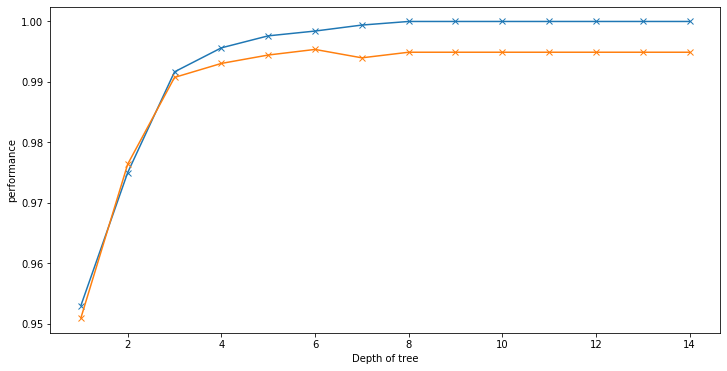

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='x')
plt.plot(frame['max_depth'], frame['test_acc'], marker='x')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.show()

In [ ]:
# Checking the depth manually and passing as parameter

decTree = DecisionTreeClassifier(max_depth=6, random_state=10)
decTree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [ ]:
# Using score method to get accuracy of model
score = decTree.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.53703703703704


Text(0.5, 1, 'Accuracy Score: 0.9953703703703703')

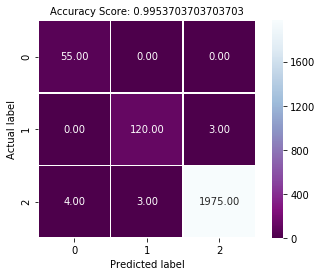

In [ ]:
# Plotting the confusion matrix

# Using predicted y-label
pred_y = decTree.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'BuPu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Checking performance with default values

train_accuracy = []
test_accuracy = []

for depth in range(1,15):
    randForest = RandomForestClassifier(max_depth=depth, random_state=10, n_estimators=10)
    randForest.fit(train_x, train_y)
    train_accuracy.append(randForest.score(train_x, train_y))
    test_accuracy.append(randForest.score(test_x, test_y))

frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.929365,0.917593
1,2,0.929563,0.917593
2,3,0.948810,0.937500
3,4,0.987103,0.977778
4,5,0.987302,0.981944
5,6,0.996825,0.992593
6,7,0.997421,0.992130
7,8,0.999008,0.992130
8,9,0.999206,0.993056
9,10,0.999008,0.990741


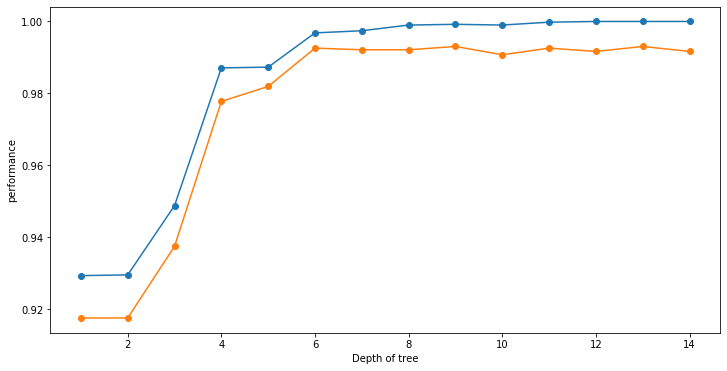

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.show()

In [ ]:
randForest = RandomForestClassifier(max_depth=13, random_state=10, n_estimators=10)
randForest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
# Using score method to get accuracy of model
score = randForest.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.30555555555556


Text(0.5, 1, 'Accuracy Score: 0.9930555555555556')

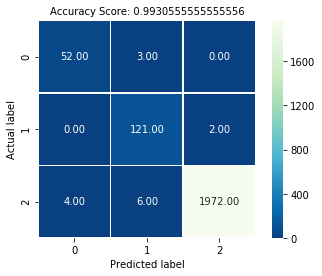

In [ ]:
# Plotting the confusion matrix

# Using predicted y-label
pred_y = randForest.predict(test_x)

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'GnBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

### Training Random Forest Classifier based only on top important features

In [ ]:
#feature importance against each variable

feature_imp = pd.Series(randForest.feature_importances_,index=train_x.columns).sort_values(ascending=False)
feature_imp

TSH                          0.541012
FTI                          0.140315
TT4                          0.103293
On_thyroxine                 0.084909
T3                           0.047890
T4U                          0.036412
Age                          0.023102
Thyroid_surgery              0.005039
Sex                          0.004856
Query_hyperthyroid           0.002864
Query_hypothyroid            0.002272
On_antithyroid_medication    0.001521
Sick                         0.001475
I131_treatment               0.001402
Query_on_thyroxine           0.001201
Psych                        0.000961
Tumor                        0.000819
Lithium                      0.000281
Goitre                       0.000251
Pregnant                     0.000126
Hypopituitary                0.000000
dtype: float64

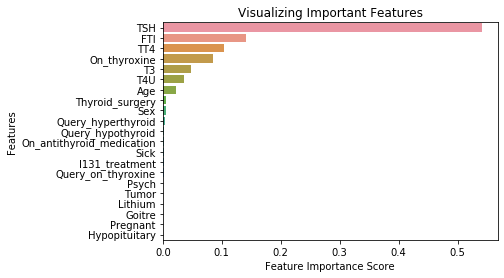

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Split dataset into features and labels
X=df[['TSH', "FTI", "TT4", "On_thyroxine", "T3"]]
Y=df['Class']
# Split dataset into training set and test set
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.30, random_state=10)

In [ ]:
# Checking performance with default values, and changed input data to "X"

train_accuracy = []
test_accuracy = []

for depth in range(1,15):
    randForest = RandomForestClassifier(max_depth=depth, random_state=10, n_estimators=10)
    randForest.fit(train_X, train_Y)
    train_accuracy.append(randForest.score(train_X, train_Y))
    test_accuracy.append(randForest.score(test_X, test_Y))

frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.943849,0.942593
1,2,0.946429,0.943056
2,3,0.962103,0.959259
3,4,0.993651,0.992593
4,5,0.994841,0.993056
5,6,0.996032,0.995833
6,7,0.997817,0.996296
7,8,0.997817,0.995833
8,9,0.998214,0.994907
9,10,0.998214,0.996296


In [ ]:
rf_feat_imp_model = RandomForestClassifier(max_depth=10, random_state=10, n_estimators=10)
rf_feat_imp_model.fit(train_X, train_Y)

# Score
print("Accuracy: ",rf_feat_imp_model.score(test_X, test_Y)*100)

Accuracy:  99.62962962962963


### Boosting the Classifiers

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=decTree, n_estimators=120, learning_rate=1)
abc.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=10,
                               

In [ ]:
# Using score method to get accuracy of model
score = abc.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.49074074074075


In [ ]:
# Load libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create adaboost classifer object
gbc = GradientBoostingClassifier(max_depth=10, learning_rate=0.6)
gbc.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.6, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Using score method to get accuracy of model
score = gbc.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.49074074074075


## Creating Ensemble Models

In [ ]:
# Voting Ensemble for Classification
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

kfold = model_selection.KFold(n_splits=15, random_state=10)

# creating the sub models
estimators_1 = []

model1 = DecisionTreeClassifier(max_depth=6, random_state=10)
estimators_1.append(('dec-tree', model1))

model2 = RandomForestClassifier(max_depth=13, random_state=10, n_estimators=10)
estimators_1.append(('rand-forest', model2))

model3 = SVC(kernel = 'linear', C = 1, gamma='auto', random_state=10)
estimators_1.append(('svm', model3))

# create the ensemble model
ensemble_1 = VotingClassifier(estimators_1)
results = model_selection.cross_val_score(ensemble_1, train_x, train_y, cv=kfold)
ensemble_1.fit(train_x, train_y)

VotingClassifier(estimators=[('dec-tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=10,
                                                     splitter='best')),
     

In [ ]:
# Using score method to get accuracy of model
score = ensemble_1.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.53703703703704


In [ ]:
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

kfold = model_selection.KFold(n_splits=25, random_state=10)

# creating the sub models
estimators_2 = []

model1 = DecisionTreeClassifier()
estimators_2.append(('dec-tree', model1))

model2 = RandomForestClassifier()
estimators_2.append(('rand-forest', model2))

model3 = LogisticRegression()
estimators_2.append(('log-regr', model3))

# create the ensemble model
ensemble_2 = VotingClassifier(estimators_2)
results = model_selection.cross_val_score(ensemble_2, train_x, train_y, cv=kfold)
ensemble_2.fit(train_x, train_y)

VotingClassifier(estimators=[('dec-tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),


In [ ]:
# Using score method to get accuracy of model
score = ensemble_2.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.25925925925925


In [ ]:
# Ensembling only Decision Trees and Random Forests
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

kfold = model_selection.KFold(n_splits=25, random_state=10)

# creating the sub models
estimators_3 = []
model1 = DecisionTreeClassifier(max_depth=depth, random_state=10)
estimators_3.append(('dec-tree', model1))

model2 = RandomForestClassifier(max_depth=13, random_state=10, n_estimators=10)
estimators_3.append(('rand-forest', model2))

# create the ensemble model
ensemble_3 = VotingClassifier(estimators_3)
results = model_selection.cross_val_score(ensemble_3, train_x, train_y, cv=kfold)
ensemble_3.fit(train_x, train_y)

VotingClassifier(estimators=[('dec-tree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=14,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=10,
                                                     splitter='best')),
    

In [ ]:
# Using score method to get accuracy of model
score = ensemble_3.score(test_x, test_y)
print("Accuracy: ", score*100)

Accuracy:  99.35185185185185


### Predicting The Condition, given the input values

In [ ]:
#Age, Sex, On_thyroxine, Query_on_thyroxine, On_antithyroid_medication, Sick, Pregnant, Thyroid_surgery, I131_treatment,
#    Query_hypothyroid, Query_hyperthyroid, Lithium, Goitre, Tumor, Hypopituitary, Psych, TSH, T3, TT4, T4U, FTI

input_1 = [[0.73, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.0006, 0.015, 0.12, 0.082, 0.146]]
ensemble_model = ensemble_2.fit(x, y)
result_1 = ensemble_model.predict(input_1)

print(result_1)

[3]


## Graphical User Interface(GUI) for values input:

In [ ]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout

slider_1 = widgets.IntSlider(min=1, max=97, description='Age:')
row_1 = slider_1

radio_1 = widgets.RadioButtons(options=['male', 'female'], description='Gender:')
radio_2 = widgets.RadioButtons(options=['yes', 'no'], description='On thyroxine:')
radio_3 = widgets.RadioButtons(options=['yes', 'no'], description='Query on thyroxine:')
radio_4 = widgets.RadioButtons(options=['yes', 'no'], description='On antithyroid medication:')
radio_5 = widgets.RadioButtons(options=['yes', 'no'], description='Sick:')
row_2 = HBox([radio_1, radio_2, radio_3, radio_4, radio_5], layout=Layout(margin='20px 0 0 0'))

radio_6 = widgets.RadioButtons(options=['yes', 'no'], description='Pregnant:')
radio_7 = widgets.RadioButtons(options=['yes', 'no'], description='Thyroid_surgery:')
radio_8 = widgets.RadioButtons(options=['yes', 'no'], description='I131 treatment:')
radio_9 = widgets.RadioButtons(options=['yes', 'no'], description='Query hypothyroid:')
radio_10 = widgets.RadioButtons(options=['yes', 'no'], description='Query hyperthyroid:')
row_3 = HBox([radio_6, radio_7, radio_8, radio_9, radio_10], layout=Layout(margin='20px 0 0 0'))

radio_11 = widgets.RadioButtons(options=['yes', 'no'], description='Lithium:')
radio_12 = widgets.RadioButtons(options=['yes', 'no'], description='Goitre:')
radio_13 = widgets.RadioButtons(options=['yes', 'no'], description='Tumor:')
radio_14 = widgets.RadioButtons(options=['yes', 'no'], description='Hypopituitary:')
radio_15 = widgets.RadioButtons(options=['yes', 'no'], description='Psych:')
row_4 = HBox([radio_11, radio_12, radio_13, radio_14, radio_15], layout=Layout(margin='20px 0 0 0'))

slider_2 = widgets.FloatSlider(min=0, max=53, description='TSH:')
slider_3 = widgets.FloatSlider(min=0.05, max=18, description='T3:')
slider_4 = widgets.FloatSlider(min=0.2, max=60, description='TT4:')
row_5 = HBox([slider_2, slider_3, slider_4], layout=Layout(margin='20px 0 0 0'))

slider_5 = widgets.FloatSlider(min=1.7, max=23.3, description='T4U:')
slider_6 = widgets.FloatSlider(min=0.2, max=64.2, description='FTI:')
row_6 = HBox([slider_5, slider_6], layout=Layout(margin='20px 0 0 0'))

gui = VBox([row_1, row_2, row_3, row_4, row_5, row_6], layout=Layout(margin='20px 0 20px 0'))
display(gui)
button = widgets.Button(description="Check my condition")
output = widgets.Output()
display(button, output)

def on_button_clicked(b):
    with output:
        output.clear_output()

        Age = slider_1.value/100
        Sex = 1 if radio_1.value=='male' else 0
        On_thyroxine = 1 if radio_2.value=='yes' else 0
        Query_on_thyroxine = 1 if radio_3.value=='yes' else 0
        On_antithyroid_medication = 1 if radio_4.value=='yes' else 0
        Sick = 1 if radio_5.value=='yes' else 0
        Pregnant = 1 if radio_6.value=='yes' else 0
        Thyroid_surgery = 1 if radio_7.value=='yes' else 0
        I131_treatment = 1 if radio_8.value=='yes' else 0
        Query_hypothyroid = 1 if radio_9.value=='yes' else 0
        Query_hyperthyroid = 1 if radio_10.value=='yes' else 0
        Lithium = 1 if radio_11.value=='yes' else 0
        Goitre = 1 if radio_12.value=='yes' else 0
        Tumor = 1 if radio_13.value=='yes' else 0
        Hypopituitary = 1 if radio_1.value=='yes' else 0
        Psych = 1 if radio_15.value=='yes' else 0
        TSH = slider_2.value/100
        T3 = slider_3.value/100
        TT4 = slider_4.value/100
        T4U = slider_5.value/100
        FTI = slider_6.value/100

        input_1 = [[Age, Sex, On_thyroxine, Query_on_thyroxine, On_antithyroid_medication, Sick, Pregnant, Thyroid_surgery, I131_treatment, Query_hypothyroid, Query_hyperthyroid, Lithium, Goitre, Tumor, Hypopituitary, Psych, TSH, T3, TT4, T4U, FTI]]
        ensemble_model = ensemble_1.fit(x, y)
        result = ensemble_model.predict(input_1)
        if result == [2]:
            print("The person is suffering from hyper-thyroidism")
        elif result == [3]:
            print("The person is suffering from hypo-thyroidism")
        else:
            print("The person is normal")

button.on_click(on_button_clicked)
# 62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.1,0.8,7.3,7.4,9.8  -> Hyperthyroid
# 43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0.5,0.29,10.4,0.28  -> Normal
# 55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.208,0.8,7.5,7.7,9.8  -> Hypothyroidism


Button(description='Check my condition', style=ButtonStyle())

Output()